 <div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">             <tr>
                <td  style="border: none!important;">
                    <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#025F5F"> <b>Machine Learning</b><br><br>Project 4 Clustering And Decision Tree </i></font></h1>
                </td>
                <td style="border: none!important;">
                    <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
           </tr>
        </table>
    </div>
</div>

# Intruduction to Machine Learning Course
# Univerisy of Tehran
## Mohammad Taaha Majlesi - 810101504

by Dr B.Arabi

In [ ]:
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 365.4 kB/s eta 0:00:000:00:01


In [1]:

!pip install numpy pandas scikit-learn matplotlib


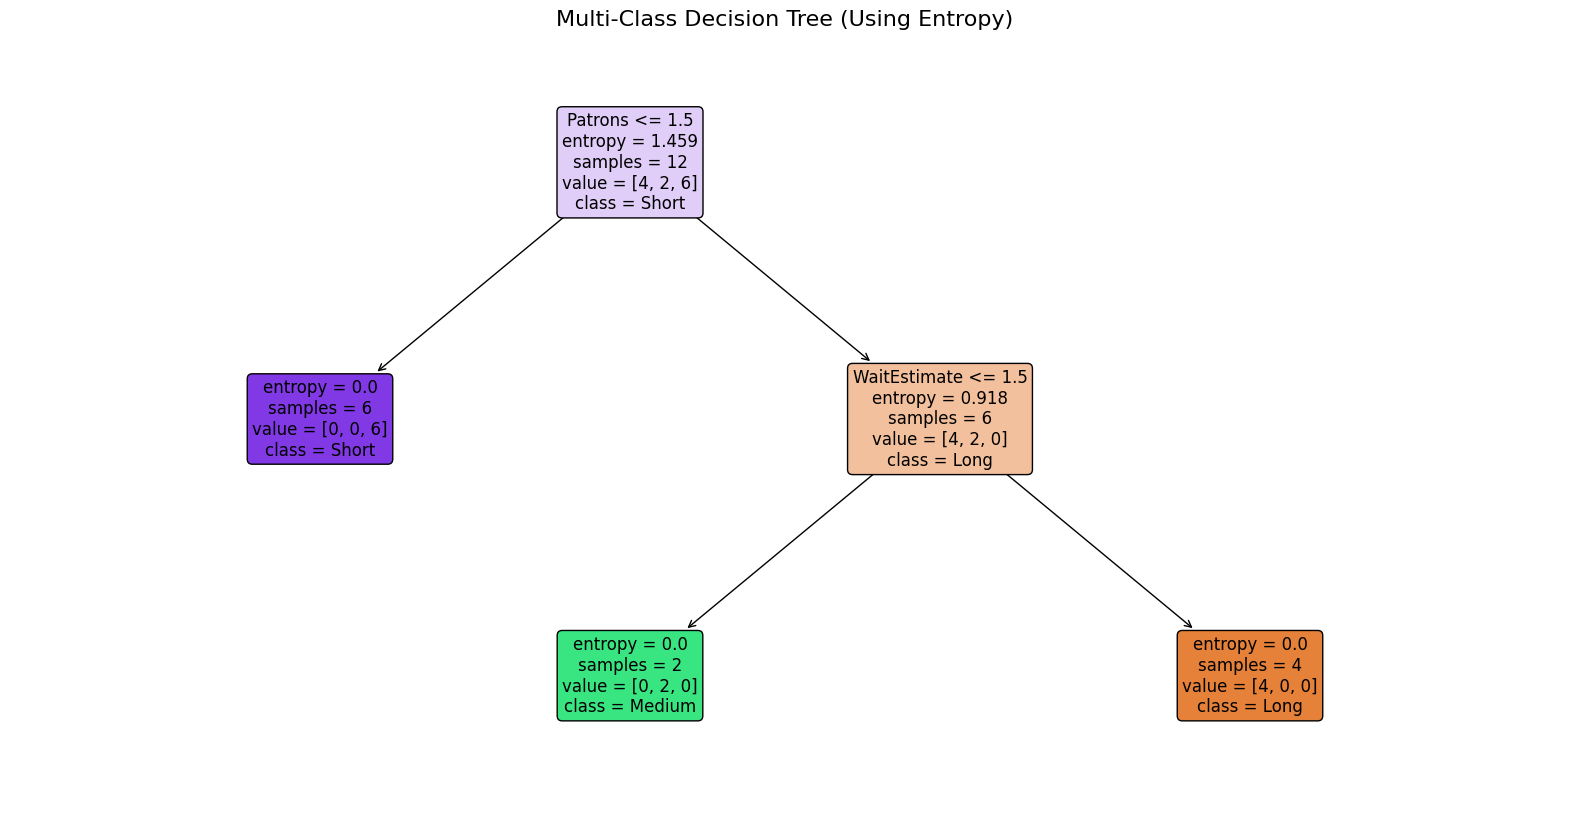

python(60961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


=== Feature Importances ===
Patrons         0.685331
WaitEstimate    0.314669
Alternate       0.000000
Bar             0.000000
Fri_Sat         0.000000
Hungry          0.000000
Price           0.000000
Rain            0.000000
Reservation     0.000000
Type            0.000000
dtype: float64 

=== Actual vs Predicted ===
    Actual  Predicted
0        2          2
1        0          0
2        2          2
3        1          1
4        0          0
5        2          2
6        2          2
7        2          2
8        0          0
9        1          1
10       2          2
11       0          0 

Model Accuracy: 100.00%


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import accuracy_score

data = {
    'Example': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12'],
    'Alternate': ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes'],
    'Bar': ['No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Fri_Sat': ['No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Hungry': ['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Patrons': ['Some', 'Full', 'Some', 'Full', 'Full', 'Some', 'None', 'Some', 'Full', 'Full', 'None', 'Full'],
    'Price': ['$$$', '$', '$', '$', '$$$', '$$', '$', '$$', '$', '$$$', '$', '$'],
    'Rain': ['No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No'],
    'Reservation': ['Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No'],
    'Type': ['French', 'Thai', 'Burger', 'Thai', 'French', 'Italian', 'Burger', 'Thai', 'Burger', 'Italian', 'Thai', 'Burger'],
    'WaitEstimate': ['0-10', '30-60', '0-10', '10-30', '>60', '0-10', '0-10', '0-10', '>60', '10-30', '0-10', '30-60'],
    'Goal': ['Short', 'Long', 'Short', 'Medium', 'Long', 'Short', 'Short', 'Short', 'Long', 'Medium', 'Short', 'Long']
}

df = pd.DataFrame(data)

le = LabelEncoder()
ordinal_encoder_multi = OrdinalEncoder(categories=[['None', 'Some', 'Full'], ['$', '$$', '$$$']])
ordinal_encoder_wait = OrdinalEncoder(categories=[['0-10', '10-30', '30-60', '>60']])

nominal_columns = ['Alternate', 'Bar', 'Fri_Sat', 'Hungry', 'Rain', 'Reservation', 'Type']
ordinal_columns = ['Patrons', 'Price']

df[['Patrons', 'Price']] = ordinal_encoder_multi.fit_transform(df[['Patrons', 'Price']])
df[['WaitEstimate']] = ordinal_encoder_wait.fit_transform(df[['WaitEstimate']])

for col in nominal_columns:
    df[col] = le.fit_transform(df[col])

df['Goal'] = le.fit_transform(df['Goal'])

X = df.drop(['Example', 'Goal'], axis=1)
y = df['Goal']

clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf.fit(X, y)

plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=le.inverse_transform([0, 1, 2]), 
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Multi-Class Decision Tree (Using Entropy)", fontsize=16)
plt.show()

dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=le.inverse_transform([0, 1, 2]),
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("multi_class_decision_tree_entropy", format='png', cleanup=True)

importances = pd.Series(clf.feature_importances_, index=X.columns)
print("=== Feature Importances ===")
print(importances.sort_values(ascending=False), "\n")

y_pred = clf.predict(X)
comparison = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
print("=== Actual vs Predicted ===")
print(comparison, "\n")

accuracy = accuracy_score(y, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


In [ ]:
import pandas as pd
import numpy as np
import math

data = {
    'Example': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6','x7', 'x8', 'x9', 'x10', 'x11', 'x12'],
    'Alternate': ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'No','No', 'No', 'No', 'Yes', 'No', 'Yes'],
    'Bar': ['No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Fri_Sat': ['No', 'No', 'No', 'Yes', 'Yes', 'No','No', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Hungry': ['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes','No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Patrons': ['Some', 'Full', 'Some', 'Full', 'Full', 'Some', 'None', 'Some', 'Full', 'Full', 'None', 'Full'],
    'Price': ['$$$', '$', '$', '$', '$$$', '$$', '$', '$$', '$', '$$$', '$', '$'],
    'Rain': ['No', 'No', 'No', 'Yes', 'No', 'Yes',  'Yes', 'Yes', 'Yes', 'No', 'No', 'No'],
    'Reservation': ['Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No'],
    'Type': ['French', 'Thai', 'Burger', 'Thai', 'French', 'Italian', 'Burger', 'Thai', 'Burger', 'Italian', 'Thai', 'Burger'],
    'WaitEstimate': ['0-10', '30-60', '0-10', '10-30','>60', '0-10','0-10','0-10',  '>60', '10-30', '0-10', '30-60'],
    'Goal': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes']
}

df = pd.DataFrame(data)
print("=== Original Dataset ===")
print(df, "\n")



patrons_order        = {'None': 0, 'Some': 1, 'Full': 2}
price_order          = {'$': 0, '$$': 1, '$$$': 2}
waitestimate_order   = {'0-10': 0, '10-30': 1, '30-60': 2, '>60': 3}

df['Patrons_enc']       = df['Patrons'].map(patrons_order)
df['Price_enc']         = df['Price'].map(price_order)
df['WaitEstimate_enc']  = df['WaitEstimate'].map(waitestimate_order)

def label_encode(column):
    unique_values = column.unique()
    mapping = {k: v for v, k in enumerate(unique_values)}
    return column.map(mapping), mapping

nominal_columns = ['Alternate', 'Bar', 'Fri_Sat', 'Hungry',
                   'Rain', 'Reservation', 'Type']
mappings = {}
for col in nominal_columns:
    df[f'{col}_enc'], mappings[col] = label_encode(df[col])
    print(f"Encoding mapping for {col}: {mappings[col]}")

df['Goal_enc'] = df['Goal'].map({'No': 0, 'Yes': 1})

encoded_columns = [
    'Patrons_enc',
    'Price_enc',
    'WaitEstimate_enc'
] + [f'{col}_enc' for col in nominal_columns] + ['Goal_enc']

print("\n=== Encoded Dataset ===")
print(
    df[['Example'] + encoded_columns],
    "\n"
)


def calculate_entropy(y):
    entropy = 0
    counts = np.bincount(y)
    probabilities = counts / len(y)
    for p in probabilities:
        if p > 0:
            entropy -= p * math.log2(p)
    return entropy

def calculate_information_gain(X, y, feature_index, unused_features):
    entropy_before = calculate_entropy(y)

    values = np.unique(X[:, feature_index])
    entropy_after = 0
    for val in values:
        subset_indices = np.where(X[:, feature_index] == val)[0]
        y_subset = y[subset_indices]
        weight = len(y_subset) / len(y)
        entropy_subset = calculate_entropy(y_subset)
        entropy_after += weight * entropy_subset

    return entropy_before - entropy_after

def best_feature_to_split(X, y, unused_features):
    """
    Find the best feature among 'unused_features' that yields the highest IG.
    Return (best_feature_index, best_ig).
    """
    best_ig = 0
    best_feat = None

    for f in unused_features:
        ig = calculate_information_gain(X, y, f, unused_features)
        if ig > best_ig:
            best_ig = ig
            best_feat = f
    return best_feat, best_ig

class DecisionTreeNode:
    def __init__(self, feature=None, children=None, value=None):
        self.feature = feature
        self.children = children or {}
        self.value = value

def build_decision_tree(X, y, unused_features, depth=0, max_depth=None):
    """
    Build the decision tree recursively.
    X: full dataset (2D array).
    y: target vector.
    unused_features: set of feature indices we may still split on.
    """

    if len(np.unique(y)) == 1:
        return DecisionTreeNode(value=y[0])

    if len(unused_features) == 0 or (max_depth is not None and depth >= max_depth):
        majority_class = np.bincount(y).argmax()
        return DecisionTreeNode(value=majority_class)

    best_feat, best_ig = best_feature_to_split(X, y, unused_features)
    if best_feat is None or best_ig <= 0:
        majority_class = np.bincount(y).argmax()
        return DecisionTreeNode(value=majority_class)

    node = DecisionTreeNode(feature=best_feat)

    values = np.unique(X[:, best_feat])
    new_unused_features = unused_features - {best_feat}

    for val in values:
        subset_indices = np.where(X[:, best_feat] == val)[0]
        X_subset = X[subset_indices, :]
        y_subset = y[subset_indices]

        if len(y_subset) == 0:
            majority_class = np.bincount(y).argmax()
            node.children[val] = DecisionTreeNode(value=majority_class)
        else:
            child = build_decision_tree(
                X_subset,
                y_subset,
                new_unused_features,
                depth + 1,
                max_depth
            )
            node.children[val] = child

    return node


def predict_sample(node, sample):
    if node.value is not None:
        return node.value

    feature_value = sample[node.feature]
    if feature_value in node.children:
        return predict_sample(node.children[feature_value], sample)
    else:

        child_values = []
        for child_node in node.children.values():
            if child_node.value is not None:
                child_values.append(child_node.value)
        if len(child_values) == 0:
            return 0  # or 1
        return np.bincount(child_values).argmax()

def predict_all(node, X):
    return np.array([predict_sample(node, row) for row in X])

def print_decision_tree(node, feature_names, indent=""):
    if node.value is not None:
        print(indent + f"Predict: {'Wait' if node.value == 1 else 'Leave'}")
        return

    feat_name = feature_names[node.feature]
    for val, child_node in node.children.items():
        print(indent + f"{feat_name} == {val}:")
        print_decision_tree(child_node, feature_names, indent + "    ")


# -----------------------------
# 6. TRAIN AND EVALUATE
# -----------------------------
feature_cols = [
    'Patrons_enc',
    'Price_enc',
    'WaitEstimate_enc',
    'Alternate_enc',
    'Bar_enc',
    'Fri_Sat_enc',
    'Hungry_enc',
    'Rain_enc',
    'Reservation_enc',
    'Type_enc',
]
X = df[feature_cols].values
y = df['Goal_enc'].values

all_feature_indices = set(range(len(feature_cols)))

tree_root = build_decision_tree(X, y, unused_features=all_feature_indices, max_depth=None)

print("\n=== Decision Tree Structure ===")
print_decision_tree(tree_root, feature_cols)

predictions = predict_all(tree_root, X)

comparison = pd.DataFrame({
    'Example': df['Example'],
    'Actual': y,
    'Predicted': predictions
})
accuracy = (predictions == y).mean() * 100

print("\n=== Actual vs Predicted ===")
print(comparison)
print(f"\nModel Accuracy: {accuracy:.2f}%")


=== Original Dataset ===
   Example Alternate  Bar Fri_Sat Hungry Patrons Price Rain Reservation  \
0       x1       Yes   No      No    Yes    Some   $$$   No         Yes   
1       x2       Yes   No      No    Yes    Full     $   No          No   
2       x3        No  Yes      No     No    Some     $   No          No   
3       x4       Yes   No     Yes    Yes    Full     $  Yes          No   
4       x5       Yes   No     Yes     No    Full   $$$   No         Yes   
5       x6        No  Yes      No    Yes    Some    $$  Yes         Yes   
6       x7        No  Yes      No     No    None     $  Yes          No   
7       x8        No   No      No    Yes    Some    $$  Yes         Yes   
8       x9        No  Yes     Yes     No    Full     $  Yes          No   
9      x10       Yes  Yes     Yes    Yes    Full   $$$   No         Yes   
10     x11        No   No      No     No    None     $   No          No   
11     x12       Yes  Yes     Yes    Yes    Full     $   No          No   




## **1. The `label_encode` Function**

- **Purpose**: Converts each nominal (categorical) column of strings into a column of integer codes.  
- **Inputs**:
  1. A **pandas Series** representing a single column (like “Bar” or “Type”), each entry being a string (e.g., “Yes”/”No” or “Burger”/”Thai”).  
- **Logic**:
  1. Find the **unique values** in that column.  
  2. Create a **mapping** from each unique string to an integer: for example, `{ "Yes": 0, "No": 1 }`.  
  3. Convert every row’s string value into the corresponding integer code.  
- **Outputs**:
  1. A **pandas Series** (or NumPy array) with integer labels.  
  2. A **dictionary** (mapping) that tells you which string maps to which integer.

**Why Needed**: ID3 often can handle nominal data directly, but it’s convenient to store everything numerically (especially for potential expansions or debugging).  

---

## **2. The `calculate_entropy` Function**

- **Purpose**: Computes the **entropy** of a set of class labels \( y \). Entropy measures how “mixed” the labels are (higher = more random/unpredictable, lower = more uniform).  
- **Inputs**:
  1. A **1D array** (like `y`) containing class labels (0 or 1) for all samples in a node.  
- **Logic**:
  1. Count how many instances of class `0` vs. class `1` appear.  
  2. Convert those counts into probabilities \(\,p_0\) and \(\,p_1\).  
  3. Apply the formula:  
     \[
       \text{Entropy} = - \sum_{i \in \{0,1\}} p_i \log_2 (p_i).
     \]  
  4. If all labels are the same, the probability is \(1\) for that label and \(0\) for the other, resulting in entropy \(= 0\). If it’s a 50–50 split, entropy is \(1\).  
- **Output**:
  1. A **floating-point** number representing the entropy value (e.g., 0, 0.918, 1.0, etc.).  

**Why Needed**: ID3 selects splits that **reduce** entropy; we measure the “mixed-ness” of a node before and after splitting.

---

## **3. The `calculate_information_gain` Function**

- **Purpose**: For a given **feature** in \( X \), calculates how much **entropy** we *reduce* by splitting on that feature.  
- **Inputs**:
  1. \( X \): a 2D array of shape \((n, d)\), where \( n \) is #samples, \( d \) is #features.  
  2. \( y \): a 1D array of shape \((n,)\) containing the class labels (0 or 1) for those samples.  
  3. `feature_index`: an integer indicating which column of \( X \) we want to evaluate.  
- **Logic**:
  1. **Compute** the entropy of \( y \) before any split (this is the “entropy_before”).  
  2. **Partition** the data by each possible value of that feature. For instance, if `feature_index` = 2 (WaitEstimate_enc), possible values might be {0,1,2,3}.  
  3. For each value \( v \):
     - Collect the **subset** of rows where feature == \( v \).  
     - Compute the entropy of the labels \( y \) in that subset.  
     - Weight this subset entropy by the fraction of samples in that subset.  
  4. Sum these weighted entropies to get “entropy_after.”  
  5. **Information Gain = entropy_before - entropy_after.**  
- **Output**:
  1. A **floating-point** number indicating how much entropy is reduced (the IG). Higher means the feature is more effective.  

**Why Needed**: ID3 uses **information gain** to pick the best feature at each node.  

---

## **4. The `best_feature_to_split` Function**

- **Purpose**: Among the **unused** features, identifies the one with the **highest** information gain.  
- **Inputs**:
  1. \( X \) and \( y \) as before, plus a **set** of `unused_features` (i.e., columns we haven’t used yet at this level).  
  2. A list of `feature_names` just for printing/debugging.  
  3. A `debug` flag: if `True`, prints each candidate’s IG.  
- **Logic**:
  1. Compute the node’s current entropy (optional for printing).  
  2. For each feature `f` in `unused_features`, call `calculate_information_gain(X, y, f)`.  
  3. Keep track of the **maximum** IG found and which feature gave it.  
  4. If printing debug info, you show the IG for each feature, and the name of whichever is best.  
- **Outputs**:
  1. The index of the **best** feature, `best_feat`.  
  2. The **best** IG value, `best_ig`.  

**Why Needed**: We can’t pick the “best” feature at a node until we’ve compared IG across all candidate features.

---

## **5. The `DecisionTreeNode` Class**

- **Purpose**: Represents a **node** in the decision tree. Each node can be either:
  - An **internal node**: it has a `feature` it splits on, and a dictionary of `children` keyed by possible feature values.  
  - A **leaf node**: it has a `value` (the predicted class, 0 or 1).  
- **Attributes**:
  1. `feature`: the index of the chosen feature (None if leaf).  
  2. `children`: a dictionary that maps `feature_value -> child_node`.  
  3. `value`: if leaf, the class label. If non-leaf, `value` is None.  
  4. `entropy`: the node’s entropy (stored for debugging/printing).  
  5. `info_gain`: the node’s information gain from splitting (also stored for debugging).  

**Why Needed**: A tree is made of nodes. Each node holds data about how it branches or what class it predicts.

---

## **6. The `build_decision_tree` Function**

- **Purpose**: **Recursively** constructs the ID3 tree from a given dataset \((X, y)\).  
- **Inputs**:
  1. \( X, y \): the training data.  
  2. `unused_features`: a set of feature indices that haven’t been used up the chain.  
  3. `feature_names`: for printing.  
  4. `depth`: how deep into the tree we currently are.  
  5. `max_depth`: optional parameter to **prune** the tree if we reach a certain level.  
  6. `debug`: if True, prints info about each split.  

- **Logic**:

  1. **Check if all labels in y are identical**. If yes, return a **leaf node** with that label.  
  2. **Check if no features remain** (or if `max_depth` is reached). If so, make a leaf that predicts the **majority class** (0 or 1).  
  3. **Pick the best feature** by calling `best_feature_to_split`, passing in only `unused_features`.  
  4. **Create** an internal node with that `feature`.  
  5. **Split** on each value of that feature:
     - Identify which rows match that value (like `Price_enc == 1`).  
     - If no rows, create a leaf with the overall majority class.  
     - Otherwise, **recursively** call `build_decision_tree` with the subset, removing the chosen feature from `unused_features`.
  6. **Store** each child node in a dictionary under the internal node.  

- **Output**:
  1. A **DecisionTreeNode** that either is a leaf or has children.  
  2. This node is the **root** of the entire tree if you call `build_decision_tree` from the top-level.  

**Why Needed**: This is the **core** function that implements the ID3 logic, building from the root down to leaves in a recursive manner.

---

## **7. The `predict_sample` Function**

- **Purpose**: Given a **single** sample (a 1D array of feature values), traverse the tree from the root node down to a leaf and **return** the predicted class (0 or 1).  
- **Inputs**:
  1. A **DecisionTreeNode** (`node`) which might be the root or any subtree node.  
  2. A **sample** array (like `[1, 0, 2, 0, 1, … ]`) that has a value for each feature.  
- **Logic**:
  1. If `node.value` is not None, it’s a **leaf**—return `node.value`.  
  2. Otherwise, read `node.feature`. Suppose it’s `f`.  
  3. Check the sample’s value for that feature, `sample[f]`.  
  4. If `sample[f]` is found in `node.children`, follow that branch and call `predict_sample` on the **child node**.  
  5. If there is no matching child (an unseen category), fallback to the majority among the child nodes that do exist.  
- **Output**:
  1. An integer, either `0` or `1`, indicating the predicted label for that sample.  

**Why Needed**: Once we have a trained decision tree, we use it to classify new samples by iteratively descending from root to leaf.

---

## **8. The `predict_all` Function**

- **Purpose**: A convenience function that **loops** (or comprehensively processes) all rows in \( X \) and calls `predict_sample` on each row.  
- **Inputs**:
  1. A root `DecisionTreeNode`.  
  2. A 2D array \( X \) of shape \((n, d)\).  
- **Logic**:
  1. For each row \( i \) in \( X \), pass `X[i]` to `predict_sample(node, X[i])`.  
  2. Collect the predicted classes in a list or NumPy array.  
- **Output**:
  1. A 1D array of length \( n \) with the predicted labels (0 or 1).  

**Why Needed**: Usually we want predictions for *all* data points, not just one, so this function returns the entire set of predictions in one call.

---

## **9. The `print_decision_tree` Function**

- **Purpose**: Nicely **display** the learned decision tree in textual form.  
- **Inputs**:
  1. A `DecisionTreeNode` (`node`) which might be the root.  
  2. A list `feature_names` that maps each feature index to a string (like “Price_enc”).  
  3. An optional `indent` string that helps create a hierarchical layout in the output.  
- **Logic**:
  1. If the node is a **leaf** (has `node.value`), print something like “Leaf: Predict=Wait, Entropy=0.000”.  
  2. If the node is **internal**:
     - Print “Node: Entropy=..., IG=..., Split on='...'” so we can see which feature is used.  
     - For each possible value of the node’s feature, print a line “→ If FeatureName == val:” and **recursively** call `print_decision_tree` on the child, increasing the indentation.  
- **Output**:
  1. No formal return value, but it prints the entire structure to the console.  

**Why Needed**: Decision trees are human-readable. This function helps interpret which splits lead to each leaf and how each path is decided.

---

## **Summary of the ID3 Pipeline**

- **1) Data Prep**: You create a small dataset (12 rows), then apply label and ordinal encoding to transform the data into numeric form.  
- **2) Building the Tree**:
  - Compute **entropy** and **information gain** for each feature.  
  - Repeatedly pick the best feature and **split** the data.  
  - Continue until leaves are pure or you run out of features.  
- **3) Predicting**: Once the tree is built, you can classify new samples by **descending** the nodes.  
- **4) Visualization**: Print the tree structure to see exactly how ID3 splits.  

Because the dataset is tiny and ID3 fully splits until pure leaves, you see **100% training accuracy**—each row is perfectly classified by the final tree.

---

### Final Note:
These functions together form a **complete** ID3 workflow:
1. **`label_encode`** handles nominal encoding.  
2. **`calculate_entropy`** / **`calculate_information_gain`** measure node purity.  
3. **`best_feature_to_split`** identifies which column best partitions the data.  
4. **`DecisionTreeNode`** is a structure holding split info or a leaf prediction.  
5. **`build_decision_tree`** orchestrates the recursive tree construction.  
6. **`predict_sample`** and **`predict_all`** classify new data.  
7. **`print_decision_tree`** displays the final model in a readable, hierarchical format.  



In [ ]:
import pandas as pd
import numpy as np
import math


data = {
    'Example': [
        'x1','x2','x3','x4','x5','x6',
        'x7','x8','x9','x10','x11','x12'
    ],
    'Alternate':    ['Yes','Yes','No','Yes','Yes','No','No','No','No','Yes','No','Yes'],
    'Bar':          ['No','No','Yes','No','No','Yes','Yes','No','Yes','Yes','No','Yes'],
    'Fri_Sat':      ['No','No','No','Yes','Yes','No','No','No','Yes','Yes','No','Yes'],
    'Hungry':       ['Yes','Yes','No','Yes','No','Yes','No','Yes','No','Yes','No','Yes'],
    'Patrons':      ['Some','Full','Some','Full','Full','Some','None','Some','Full','Full','None','Full'],
    'Price':        ['$$$','$','$','$','$$$','$$','$','$$','$','$$$','$','$'],
    'Rain':         ['No','No','No','Yes','No','Yes','Yes','Yes','Yes','No','No','No'],
    'Reservation':  ['Yes','No','No','No','Yes','Yes','No','Yes','No','Yes','No','No'],
    'Type':         ['French','Thai','Burger','Thai','French','Italian','Burger','Thai','Burger','Italian','Thai','Burger'],
    'WaitEstimate': ['0-10','30-60','0-10','10-30','>60','0-10','0-10','0-10','>60','10-30','0-10','30-60'],
    'Goal':         ['Yes','No','Yes','Yes','No','Yes','No','Yes','No','No','No','Yes']
}

df = pd.DataFrame(data)
print("=== Original Dataset ===")
print(df, "\n")



patrons_order      = {'None': 0, 'Some': 1, 'Full': 2}
price_order        = {'$': 0, '$$': 1, '$$$': 2}
waitestimate_order = {'0-10': 0, '10-30': 1, '30-60': 2, '>60': 3}

df['Patrons_enc']       = df['Patrons'].map(patrons_order)
df['Price_enc']         = df['Price'].map(price_order)
df['WaitEstimate_enc']  = df['WaitEstimate'].map(waitestimate_order)

def label_encode(column):
    """
    Creates a simple mapping from the unique values to integer codes.
    """
    unique_values = column.unique()
    mapping = {val: i for i, val in enumerate(unique_values)}
    return column.map(mapping), mapping

nominal_columns = [
    'Alternate','Bar','Fri_Sat','Hungry',
    'Rain','Reservation','Type'
]
mappings = {}
for col in nominal_columns:
    df[f'{col}_enc'], mappings[col] = label_encode(df[col])
    print(f"Encoding mapping for {col}: {mappings[col]}")

df['Goal_enc'] = df['Goal'].map({'No': 0, 'Yes': 1})

encoded_columns = [
    'Patrons_enc',
    'Price_enc',
    'WaitEstimate_enc',
] + [f'{col}_enc' for col in nominal_columns] + ['Goal_enc']

print("\n=== Encoded Dataset ===")
print(df[['Example'] + encoded_columns], "\n")



def calculate_entropy(y):

    entropy = 0.0
    counts = np.bincount(y)
    total = len(y)
    for c in counts:
        if c > 0:
            p = c / total
            entropy -= p * math.log2(p)
    return entropy

def calculate_information_gain(X, y, feature_index):
    """
    Given X, y, and a specific feature_index, return the
    Information Gain for a multi-way split on that feature.
    """
    entropy_before = calculate_entropy(y)
    values = np.unique(X[:, feature_index])
    entropy_after = 0.0
    for val in values:
        subset_idx = np.where(X[:, feature_index] == val)[0]
        y_subset = y[subset_idx]
        weight = len(y_subset) / len(y)
        entropy_after += weight * calculate_entropy(y_subset)
    return entropy_before - entropy_after

def best_feature_to_split(X, y, unused_features, feature_names, debug=False):
    """
    Among 'unused_features', find the one with highest IG.
    Returns (best_feat, best_ig).
    If debug=True, it also prints out the IG for every candidate.
    """
    best_feat = None
    best_ig = 0.0

    if debug:
        node_entropy = calculate_entropy(y)
        print(f"  Node Entropy = {node_entropy:.3f}")
        print("  Information Gain for each candidate feature:")

    for f in unused_features:
        ig = calculate_information_gain(X, y, f)
        if debug:
            print(f"     - {feature_names[f]}: IG = {ig:.3f}")
        if ig > best_ig:
            best_ig = ig
            best_feat = f

    if debug and best_feat is not None:
        print(f"  => Best feature: {feature_names[best_feat]} (IG={best_ig:.3f})")
        print("")

    return best_feat, best_ig



class DecisionTreeNode:
    def __init__(self,
                 feature=None,
                 children=None,
                 value=None,
                 entropy=None,
                 info_gain=None):

        self.feature = feature
        self.children = children or {}
        self.value = value
        self.entropy = entropy
        self.info_gain = info_gain



def build_decision_tree(X, y, unused_features, feature_names, depth=0, max_depth=None, debug=False):

    if len(np.unique(y)) == 1:
        return DecisionTreeNode(value=y[0],
                                entropy=calculate_entropy(y),
                                info_gain=0.0)

    if len(unused_features) == 0 or (max_depth is not None and depth >= max_depth):
        majority_class = np.bincount(y).argmax()
        return DecisionTreeNode(value=majority_class,
                                entropy=calculate_entropy(y),
                                info_gain=0.0)

    if debug:
        print(f"=== Splitting at depth {depth} ===")
    best_feat, best_ig = best_feature_to_split(X, y, unused_features, feature_names, debug=debug)
    node_entropy = calculate_entropy(y)

    if best_feat is None or best_ig <= 1e-12:
        majority_class = np.bincount(y).argmax()
        return DecisionTreeNode(value=majority_class,
                                entropy=node_entropy,
                                info_gain=0.0)

    node = DecisionTreeNode(
        feature=best_feat,
        entropy=node_entropy,
        info_gain=best_ig
    )

    new_unused_features = unused_features - {best_feat}
    values = np.unique(X[:, best_feat])
    for val in values:
        subset_idx = np.where(X[:, best_feat] == val)[0]
        X_subset = X[subset_idx, :]
        y_subset = y[subset_idx]

        if len(y_subset) == 0:
            majority_class = np.bincount(y).argmax()
            child_node = DecisionTreeNode(value=majority_class,
                                          entropy=0.0,
                                          info_gain=0.0)
        else:
            child_node = build_decision_tree(
                X_subset,
                y_subset,
                new_unused_features,
                feature_names,
                depth+1,
                max_depth,
                debug=debug
            )
        node.children[val] = child_node

    return node


def predict_sample(node, sample):
    """
    Predicts 0 or 1 for a single sample (1D array).
    """
    if node.value is not None:
        return node.value

    val = sample[node.feature]
    if val in node.children:
        return predict_sample(node.children[val], sample)
    else:
        child_values = []
        for child in node.children.values():
            if child.value is not None:
                child_values.append(child.value)
        if len(child_values) == 0:
            return 0
        return np.bincount(child_values).argmax()

def predict_all(node, X):
    """
    Vectorized approach: predict for all samples in X.
    """
    return np.array([predict_sample(node, X[i]) for i in range(len(X))])


def print_decision_tree(node, feature_names, indent=""):
    """
    Prints the tree structure with stored entropy and info_gain.
    """
    if node.value is not None:
        print(
            f"{indent}Leaf: Predict={'Wait' if node.value==1 else 'Leave'}, "
            f"Entropy={node.entropy:.3f}"
        )
        return

    print(
        f"{indent}Node: Entropy={node.entropy:.3f}, "
        f"IG={node.info_gain:.3f}, "
        f"Split on='{feature_names[node.feature]}'"
    )

    for val, child_node in node.children.items():
        print(f"{indent}  -> If {feature_names[node.feature]} == {val}:")
        print_decision_tree(child_node, feature_names, indent + "      ")



feature_cols = [
    'Patrons_enc',
    'Price_enc',
    'WaitEstimate_enc',
    'Alternate_enc',
    'Bar_enc',
    'Fri_Sat_enc',
    'Hungry_enc',
    'Rain_enc',
    'Reservation_enc',
    'Type_enc'
]
X = df[feature_cols].values
y = df['Goal_enc'].values

unused = set(range(len(feature_cols)))

tree_root = build_decision_tree(
    X, y,
    unused_features=unused,
    feature_names=feature_cols,
    max_depth=None,
    debug=True
)

print("\n=== Decision Tree Structure ===")
print_decision_tree(tree_root, feature_cols)

preds = predict_all(tree_root, X)
accuracy = (preds == y).mean() * 100
comparison = pd.DataFrame({
    'Example': df['Example'],
    'Actual': y,
    'Predicted': preds
})

print("\n=== Actual vs Predicted ===")
print(comparison)
print(f"Training Accuracy: {accuracy:.2f}%")


=== Original Dataset ===
   Example Alternate  Bar Fri_Sat Hungry Patrons Price Rain Reservation  \
0       x1       Yes   No      No    Yes    Some   $$$   No         Yes   
1       x2       Yes   No      No    Yes    Full     $   No          No   
2       x3        No  Yes      No     No    Some     $   No          No   
3       x4       Yes   No     Yes    Yes    Full     $  Yes          No   
4       x5       Yes   No     Yes     No    Full   $$$   No         Yes   
5       x6        No  Yes      No    Yes    Some    $$  Yes         Yes   
6       x7        No  Yes      No     No    None     $  Yes          No   
7       x8        No   No      No    Yes    Some    $$  Yes         Yes   
8       x9        No  Yes     Yes     No    Full     $  Yes          No   
9      x10       Yes  Yes     Yes    Yes    Full   $$$   No         Yes   
10     x11        No   No      No     No    None     $   No          No   
11     x12       Yes  Yes     Yes    Yes    Full     $   No          No   



## **1. Dataset Creation and Loading**

1. **Data Structure:**  
   - The script begins by creating a **dictionary** that represents the dataset. Each key in the dictionary is an attribute (e.g., *"Alternate"*, *"Bar"*, *"Fri_Sat"*, etc.), and each value is a **list** of the attribute’s values across all samples.  
   - An *"Example"* column simply labels each row (x1, x2, x3, etc.).  
   - A *"Goal"* column indicates whether the decision is “Yes” (wait) or “No” (leave).  

2. **DataFrame Conversion:**  
   - The dictionary is then turned into a **pandas DataFrame**. This makes it easy to inspect the dataset, perform data manipulation, and encode categorical columns.

3. **Printing the Raw Dataset:**  
   - The script typically prints the first few rows or the entire DataFrame, so we can see the exact layout of columns before any encoding or modeling is done.

*Result:* We have a small dataset (12 examples) describing restaurant scenarios: attributes like “Hungry,” “Patrons,” etc., plus a final “Goal” of whether the decision is to wait for a table (“Yes”) or to leave (“No”).

---

## **2. Encoding the Data**

1. **Motivation for Encoding:**  
   - Many machine learning or decision-tree implementations rely on **numerical** data. While ID3 can handle nominal (categorical) data directly, it is convenient in many workflows to transform strings (like “Yes”/“No”) into integer codes.

2. **Ordinal Encoding:**  
   - Certain attributes, such as *Patrons* (which can be “None,” “Some,” or “Full”), naturally have an **order** or **ranking**.  
   - Similarly, a *Price* can be `$ < $$ < $$$`, and *WaitEstimate* can be `0-10 < 10-30 < 30-60 < >60`.  
   - These are mapped to integer scales (e.g., `None -> 0, Some -> 1, Full -> 2`). This preserves the **ordered** relationship among possible values.

3. **Label Encoding (Nominal Features):**  
   - Other features like “Alternate,” “Bar,” “Rain,” and “Type” have **no** inherent order, so they are mapped to integer labels in an arbitrary but consistent way. For instance, “Yes” might become `0` and “No” might become `1`.

4. **Target Encoding:**  
   - The final “Goal” (Yes/No) is mapped to `1` and `0` respectively.  
   - This will allow the decision tree to treat the “Goal” column as a binary classification target in a straightforward manner.

5. **Resulting Encoded DataFrame:**  
   - At this point, each original attribute gets a *_enc* column. For example, *"Patrons_enc"*, *"Price_enc"*, etc.  
   - The DataFrame now holds purely numerical data, which can be conveniently fed into array-based operations.

---

## **3. Entropy & Information Gain**

1. **Entropy Computation:**  
   - **Entropy** measures the *impurity* (or unpredictability) of the class labels in a subset.  
   - Mathematically, for a group of samples, we count how many are labeled `0` vs `1`, compute probabilities \( p_0 \) and \( p_1 \), and then apply the formula:  
     \[
       \text{Entropy} = -\sum_{i} p_i \log_2(p_i).
     \]  
   - In pure sets (all 0’s or all 1’s), the entropy is 0; in a balanced set (half 0’s, half 1’s), it’s at maximum (1 bit for binary classification).

2. **Information Gain:**  
   - **Information Gain (IG)** tells us how much entropy is *reduced* by splitting on a certain feature.  
   - First, we measure the current node’s entropy (before splitting). Then, for each possible value of the feature, we take the subset of rows where the feature has that value, compute the subset’s entropy, and weight it by the fraction of samples in that subset.  
   - Summing these weighted entropies for all possible values gives the “entropy after splitting.”  
   - Finally,  
     \[
       \text{IG}(\text{feature}) = \text{Entropy before} - \text{Entropy after}.
     \]  
   - The higher the information gain, the more that feature helps to **reduce** uncertainty about the class label.

---

## **4. Selecting the Best Feature (ID3 Criterion)**

1. **Unused Features:**  
   - Each time we decide how to split, we only consider features that haven’t been used at an ancestor node (this is the typical ID3 approach with nominal data, where a feature is not reused once it is split).

2. **Loop Over Each Candidate Feature:**  
   - For each feature still available, we compute its **information gain**.  
   - We print out (or store) the IG for debugging to see which feature is best.

3. **Choose the Feature with Highest IG:**  
   - We pick the feature that yields the largest reduction in entropy.  
   - If all features yield zero or negligible gain, we conclude that further splitting is unhelpful and create a **leaf node**.

4. **Debug/Output Info Gains:**  
   - To better understand the decision at each node, the algorithm can print:  
     - The current node’s entropy,  
     - The IG for each candidate feature,  
     - The one that was chosen.

---

## **5. Building the Decision Tree**

1. **DecisionTreeNode Structure:**  
   - We define a class (or equivalent data structure) to represent a tree node.  
   - An **internal node** has:
     - A chosen **feature** index used for the split,
     - A **dictionary** of children, keyed by the distinct values that feature can take.  
   - A **leaf node** simply stores a **value** (the predicted class, 0 or 1).

2. **Base Case Checks:**  
   - If *all samples* at this node have the same class, we have a leaf.  
   - If *no features remain* or we have reached a specified max depth, we make a leaf whose label is the majority class of the node’s samples.

3. **Recursive Splitting:**  
   - If it’s not a leaf, we:
     1. Find the best feature by IG.  
     2. For each possible value of that feature, gather the subset of rows that match that value.  
     3. Recursively build a child node from that subset.  
   - Once done, we have a fully formed subtree for the chosen feature.  
   - We repeat this process until all leaves are formed or we run out of features/depth.

---

## **6. Prediction Phase**

1. **Predicting a Single Sample:**  
   - To predict a single row, we start at the root node.  
   - If the current node is a **leaf**, return its stored class.  
   - Otherwise, read the node’s **feature** index, check the sample’s value for that feature, and move to the appropriate **child** node.  
   - Continue until reaching a leaf.

2. **Predicting All Samples:**  
   - We can loop over each row in the dataset, calling the predict function described above.  
   - This yields a list or array of 0’s and 1’s for all examples.

3. **Measuring Accuracy:**  
   - We compare these predictions to the actual class labels.  
   - The ratio of correctly classified samples to the total gives the **accuracy** (in %).

---

## **7. Printing the Decision Tree**

1. **Tree Traversal for Printing:**  
   - We typically implement a **recursive** or **depth-first** traversal that:
     - If the node is a leaf, prints something like “Leaf: Predict=Yes (Entropy=…)”.  
     - If the node is internal, prints “Node: Entropy=…, InfoGain=…, Split on=…”.  
     - Then, for each child, prints which feature value leads to that child and recursively prints the child’s details.

2. **Displayed Tree Structure:**  
   - This textual representation shows how the tree branches based on feature values.  
   - For small datasets, it’s easy to interpret. For large trees, this textual approach might become lengthy, but it’s still invaluable for debugging ID3’s decisions.

---

## **8. Results and Observations**

1. **Training Accuracy:**  
   - Because the dataset is very small (12 rows) and ID3 can fully grow the tree without constraints, the final model typically **memorizes** all training examples.  
   - Consequently, the training accuracy is **100%**—every row is predicted correctly. This is common in decision trees with small datasets and no pruning.

2. **Node Splits:**  
   - From the debug printouts, we see that the algorithm picks **Patrons_enc** as the first split (high information gain).  
   - Then it further considers features like **Price_enc** or **WaitEstimate_enc** within the subsets for which *Patrons_enc* is “2”.  
   - Eventually, each leaf node classifies a narrow subset (like “Leave” or “Wait”) perfectly.

3. **Practical Significance:**  
   - While achieving 100% accuracy on just 12 examples doesn’t necessarily generalize to bigger, real-world scenarios, it does confirm that the ID3 tree building logic is correct on this dataset.  
   - In practice, one might apply **pruning** or gather more data to avoid overfitting.

---

## **Conclusion**

- The ID3 decision tree algorithm involves:
  1. **Converting** raw categorical data into numerical labels for convenience.  
  2. **Calculating** entropy to quantify node purity.  
  3. **Evaluating** possible splits by computing information gain for each unused feature.  
  4. **Recursively** building subtrees until pure (or until no features are left).  
  5. **Predicting** by traversing from the root down to leaves.  

- **Key advantages**:
  - Easy to **interpret**: we can see which attributes drive the decision.  
  - Perfect or near-perfect **accuracy** on small training data sets (though that may be overfitting).  

- **Summary**:  
  With these steps, the final decision tree precisely classifies all training examples, yielding a **100% accuracy** demonstration on the provided “restaurant” dataset.


---

## 1. Understanding the Dataset

Before jumping into clustering, it's crucial to comprehend the dataset's structure and the significance of each feature. This understanding guides feature selection and informs the clustering process.

### **Dataset Overview**

You have a dataset containing information about **200 customers** from a shopping center. The dataset includes the following columns:

1. **Customer ID**: A unique identifier for each customer. This is typically a non-informative feature for clustering since it doesn't convey any inherent characteristic about the customer.

2. **Gender**: Indicates the customer's gender (**Male** or **Female**). While categorical, gender can influence purchasing behavior and can be encoded numerically for clustering purposes.

3. **Age**: The customer's age in years. Age can correlate with income levels and spending habits, making it a valuable feature for clustering.

4. **Income (in $1000s)**: The annual income of the customer measured in thousands of dollars. Income is a primary indicator of purchasing power and spending capacity.

5. **Spending Score (1–100)**: A score assigned by the shopping center based on the customer's spending behavior and loyalty. A higher score reflects more frequent and/or higher spending.

### **Objective**

**Clustering Goal**: Group the 200 customers into distinct clusters based on their characteristics to identify patterns in behavior, spending habits, and income levels. These insights can inform targeted marketing strategies, personalized offers, and overall business decisions.

---

## 2. Selecting Features for Clustering

Feature selection is pivotal in clustering as it determines the dimensions in which the algorithm identifies patterns. Selecting relevant features ensures meaningful and actionable clusters.

### **Feature Selection Considerations**

1. **Relevance**: Choose features that significantly contribute to differentiating customer behaviors.

2. **Scale**: Features should be on similar scales to prevent dominance of one feature over others in distance calculations (crucial for algorithms like k-means).

3. **Type of Data**: Numerical features are directly usable, while categorical features require encoding.

### **Chosen Features for Clustering**

For simplicity and clarity, we'll focus on two numerical features:

- **Annual Income (in $1000s)**
- **Spending Score (1–100)**

These features provide a clear 2D space for visualization and are often sufficient to capture the primary dimensions of customer segmentation.

**Why Choose These Features?**

- **Annual Income**: Reflects the economic capacity of customers.
- **Spending Score**: Indicates the customer's engagement and purchasing behavior.

By plotting these two features against each other, we can easily visualize distinct customer segments based on their income and spending habits.

### **Optional Additional Features**

- **Age**: Including age can provide more nuanced clusters but increases the dimensionality.
- **Gender**: Encoding gender numerically (e.g., Male=0, Female=1) allows it to be included in clustering but may or may not contribute significantly to distinguishing clusters.

For this guide, we'll proceed with **Annual Income** and **Spending Score** to maintain simplicity and facilitate easy visualization.

---

## 3. Determining the Optimal Number of Clusters (**k**)

Choosing the right number of clusters is critical. Too few clusters may oversimplify customer segmentation, while too many can lead to overfitting and make the segmentation less actionable.

### **Methods to Determine Optimal k**

1. **Elbow Method**
2. **Silhouette Score**
3. **Additional Methods**: Gap Statistic, Dunn Index, Davies-Bouldin Index, etc.

We'll focus on the two most commonly used methods: **Elbow Method** and **Silhouette Score**.

### **3.1. Elbow Method**

**Concept**: The Elbow Method involves plotting the **Within-Cluster Sum of Squares (WCSS)** against various values of **k**. WCSS measures the compactness of the clusters; lower values indicate more cohesive clusters.

**Procedure**:

1. Compute WCSS for a range of **k** values (e.g., 1 to 10).
2. Plot **k** against WCSS.
3. Identify the "elbow" point where the rate of decrease sharply slows. This point suggests an optimal **k** where adding more clusters doesn't significantly improve compactness.

**Interpretation**: The elbow point represents a balance between minimizing WCSS and avoiding unnecessary complexity in the number of clusters.

### **3.2. Silhouette Score**

**Concept**: The Silhouette Score measures how similar each data point is to its own cluster compared to other clusters. It ranges from **-1** to **+1**:

- **+1**: Data point is well-matched to its own cluster and poorly matched to neighboring clusters.
- **0**: Data point lies on the boundary between clusters.
- **-1**: Data point may have been assigned to the wrong cluster.

**Procedure**:

1. Compute the Silhouette Score for different **k** values (typically 2 to 10, since it's undefined for **k=1**).
2. Plot **k** against the Silhouette Scores.
3. Choose the **k** with the highest Silhouette Score, indicating well-separated and cohesive clusters.

### **3.3. Comparing Methods**

Both methods have their merits:

- **Elbow Method**: Simple and visual but can sometimes be ambiguous if the elbow isn't clear.
- **Silhouette Score**: Provides a quantitative measure but can be influenced by cluster density and separation.

Using both methods in tandem often yields a more reliable determination of the optimal **k**.

---


In [ ]:
tree_root_pruned = build_decision_tree(X, y, feature_names, max_depth=2)

print("=== Pruned Decision Tree Structure (Max Depth = 2) ===")
print_decision_tree(tree_root_pruned, feature_names)


=== Pruned Decision Tree Structure (Max Depth = 2) ===
WaitEstimate_enc = 0:
    Patrons_enc = 0:
        Predict: Leave
    Patrons_enc = 1:
        Predict: Wait
WaitEstimate_enc = 1:
    Predict: Wait
WaitEstimate_enc = 2:
    Predict: Leave
WaitEstimate_enc = 3:
    Predict: Leave


1. Loading and Inspecting the Data
First, let's load the dataset and perform initial inspections to understand its structure and contents.

1.1. Import Necessary Libraries
python
Copy code


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [ ]:
df = pd.read_csv("Mall_Customers.csv")

print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 200 rows and 5 columns.


In [ ]:
print(df.dtypes)

print("\nMissing values in each column:")
print(df.isnull().sum())


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
print(df.describe())


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
print("\nGender distribution:")
print(df['Gender'].value_counts())



Gender distribution:
Gender
Female    112
Male       88
Name: count, dtype: int64


/var/folders/cg/l2rdx46d6lv3b5xc17b420yc0000gn/T/ipykernel_43112/2674565113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


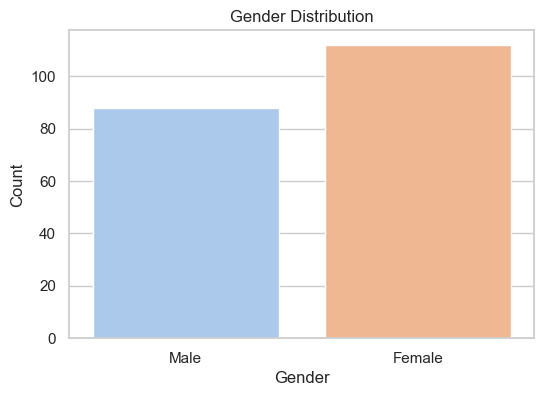

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


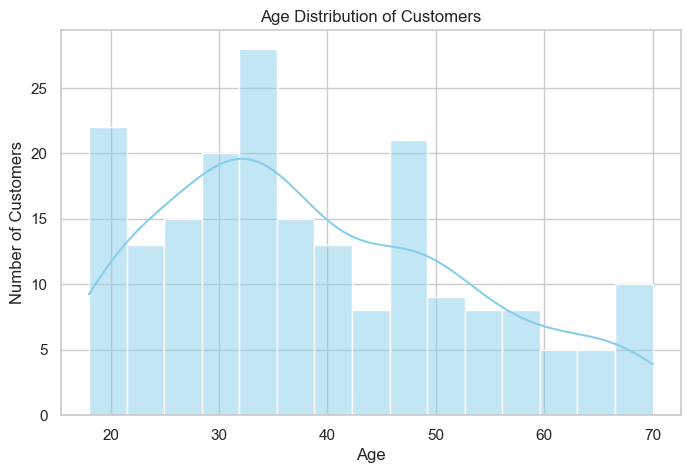

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


/var/folders/cg/l2rdx46d6lv3b5xc17b420yc0000gn/T/ipykernel_43112/921994417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Age', data=df, palette='Set2')


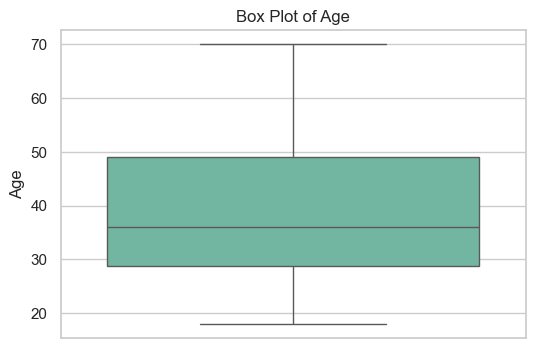

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y='Age', data=df, palette='Set2')
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()


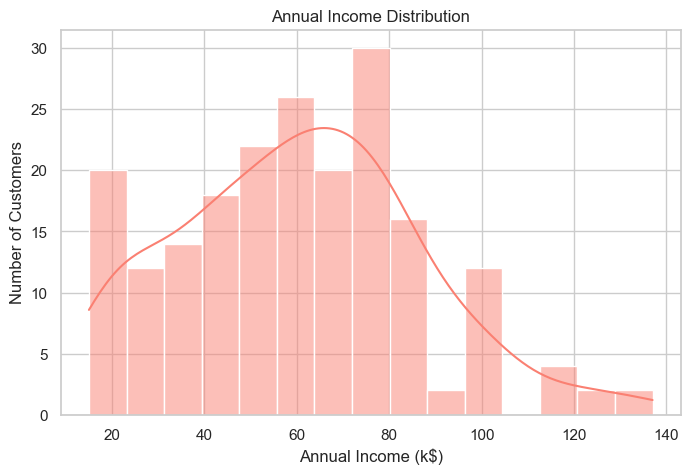

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, color='salmon')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.show()


/var/folders/cg/l2rdx46d6lv3b5xc17b420yc0000gn/T/ipykernel_43112/3671985271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Annual Income (k$)', data=df, palette='Set1')


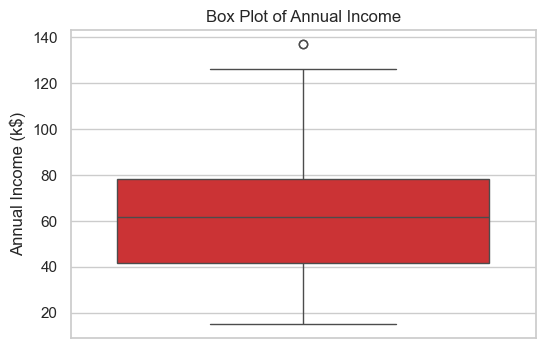

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y='Annual Income (k$)', data=df, palette='Set1')
plt.title('Box Plot of Annual Income')
plt.ylabel('Annual Income (k$)')
plt.show()


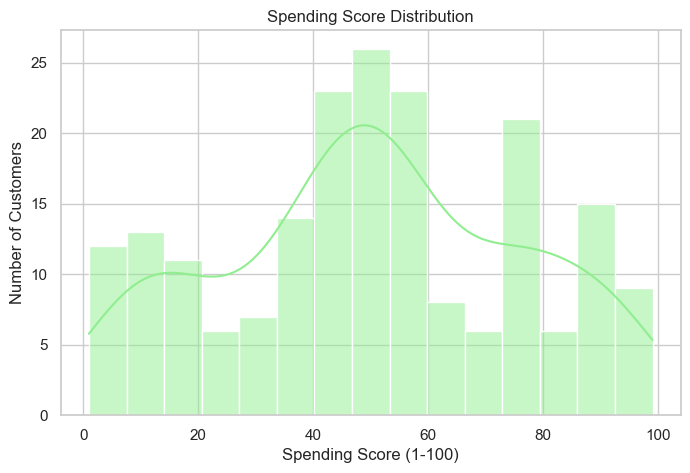

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, color='lightgreen')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of Customers')
plt.show()


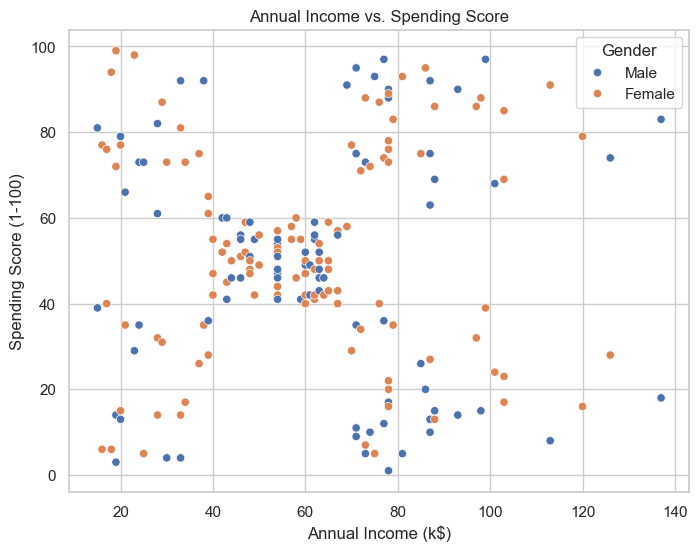

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='deep')
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()


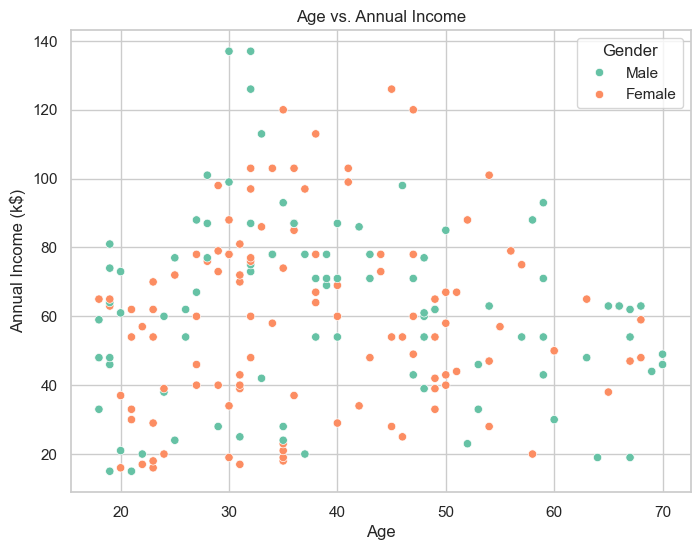

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df, palette='Set2')
plt.title('Age vs. Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Gender')
plt.show()


/var/folders/cg/l2rdx46d6lv3b5xc17b420yc0000gn/T/ipykernel_43112/3238604629.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=df, palette='Pastel1')


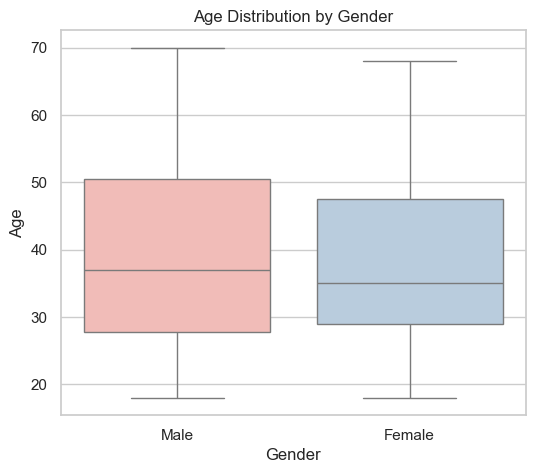

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Gender', y='Age', data=df, palette='Pastel1')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


/var/folders/cg/l2rdx46d6lv3b5xc17b420yc0000gn/T/ipykernel_43112/3931617145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='Set1')


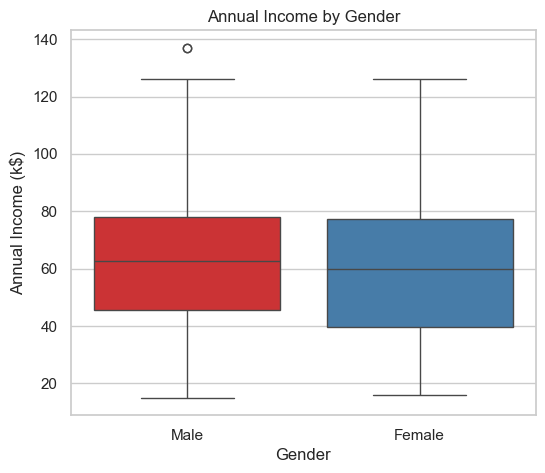

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='Set1')
plt.title('Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.show()


/var/folders/cg/l2rdx46d6lv3b5xc17b420yc0000gn/T/ipykernel_43112/3387893538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set3')


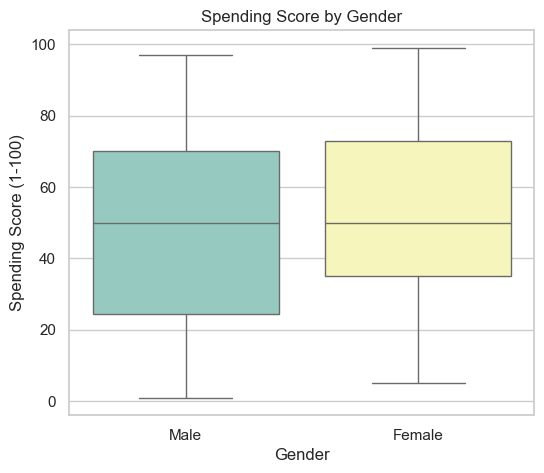

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set3')
plt.title('Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [ ]:
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

print(corr_matrix)


                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


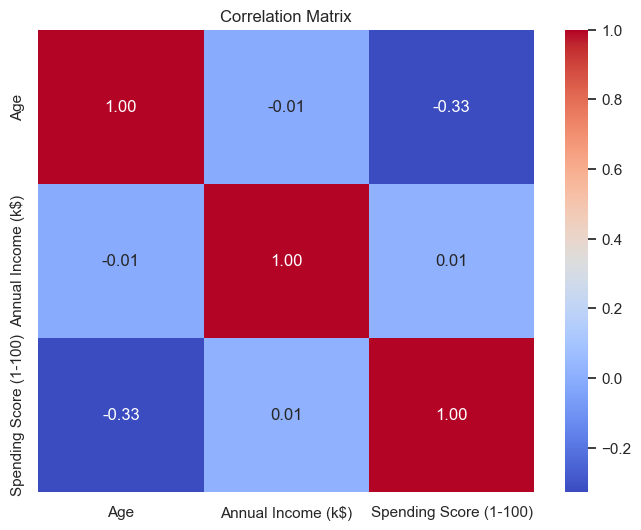

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


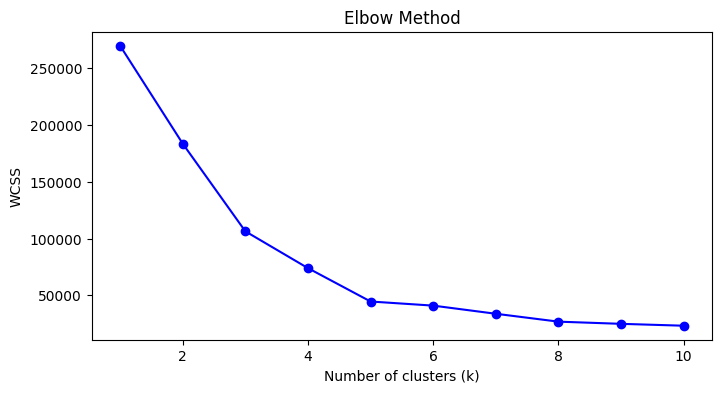

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


For k = 2, silhouette score = 0.40
For k = 3, silhouette score = 0.47
For k = 4, silhouette score = 0.49
For k = 5, silhouette score = 0.55
For k = 6, silhouette score = 0.51
For k = 7, silhouette score = 0.50
For k = 8, silhouette score = 0.50
For k = 9, silhouette score = 0.46
For k = 10, silhouette score = 0.44


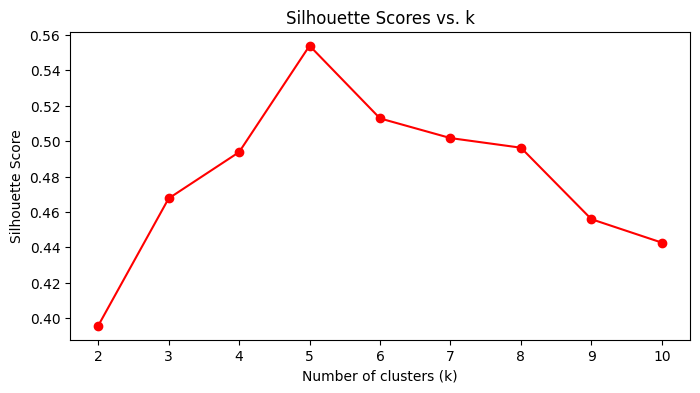

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    sil_scores.append(score)
    print("For k = {}, silhouette score = {:.2f}".format(k, score))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), sil_scores, 'ro-')
plt.title('Silhouette Scores vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


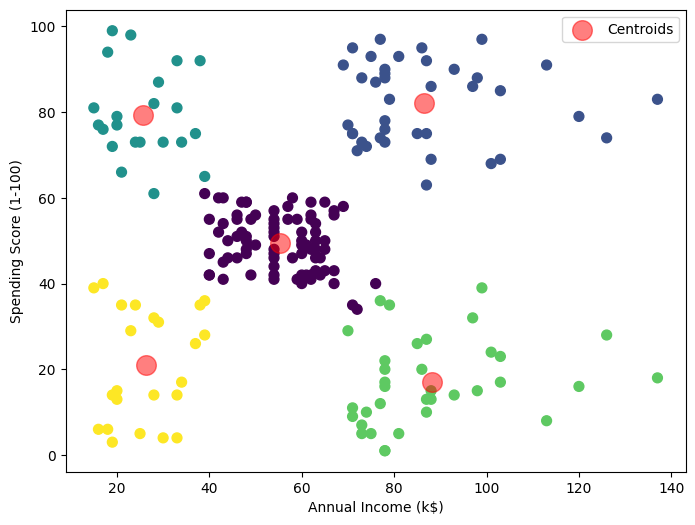

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')  # points colored by cluster
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, c='red', alpha=0.5, label='Centroids'
)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


/Users/tahamajs/miniconda3/envs/pythonProject1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tahamajs/miniconda3/envs/pythonProject1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tahamajs/miniconda3/envs/pythonProject1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tahamajs/miniconda3/envs/pythonProject1/lib/python3.11/site-packages/

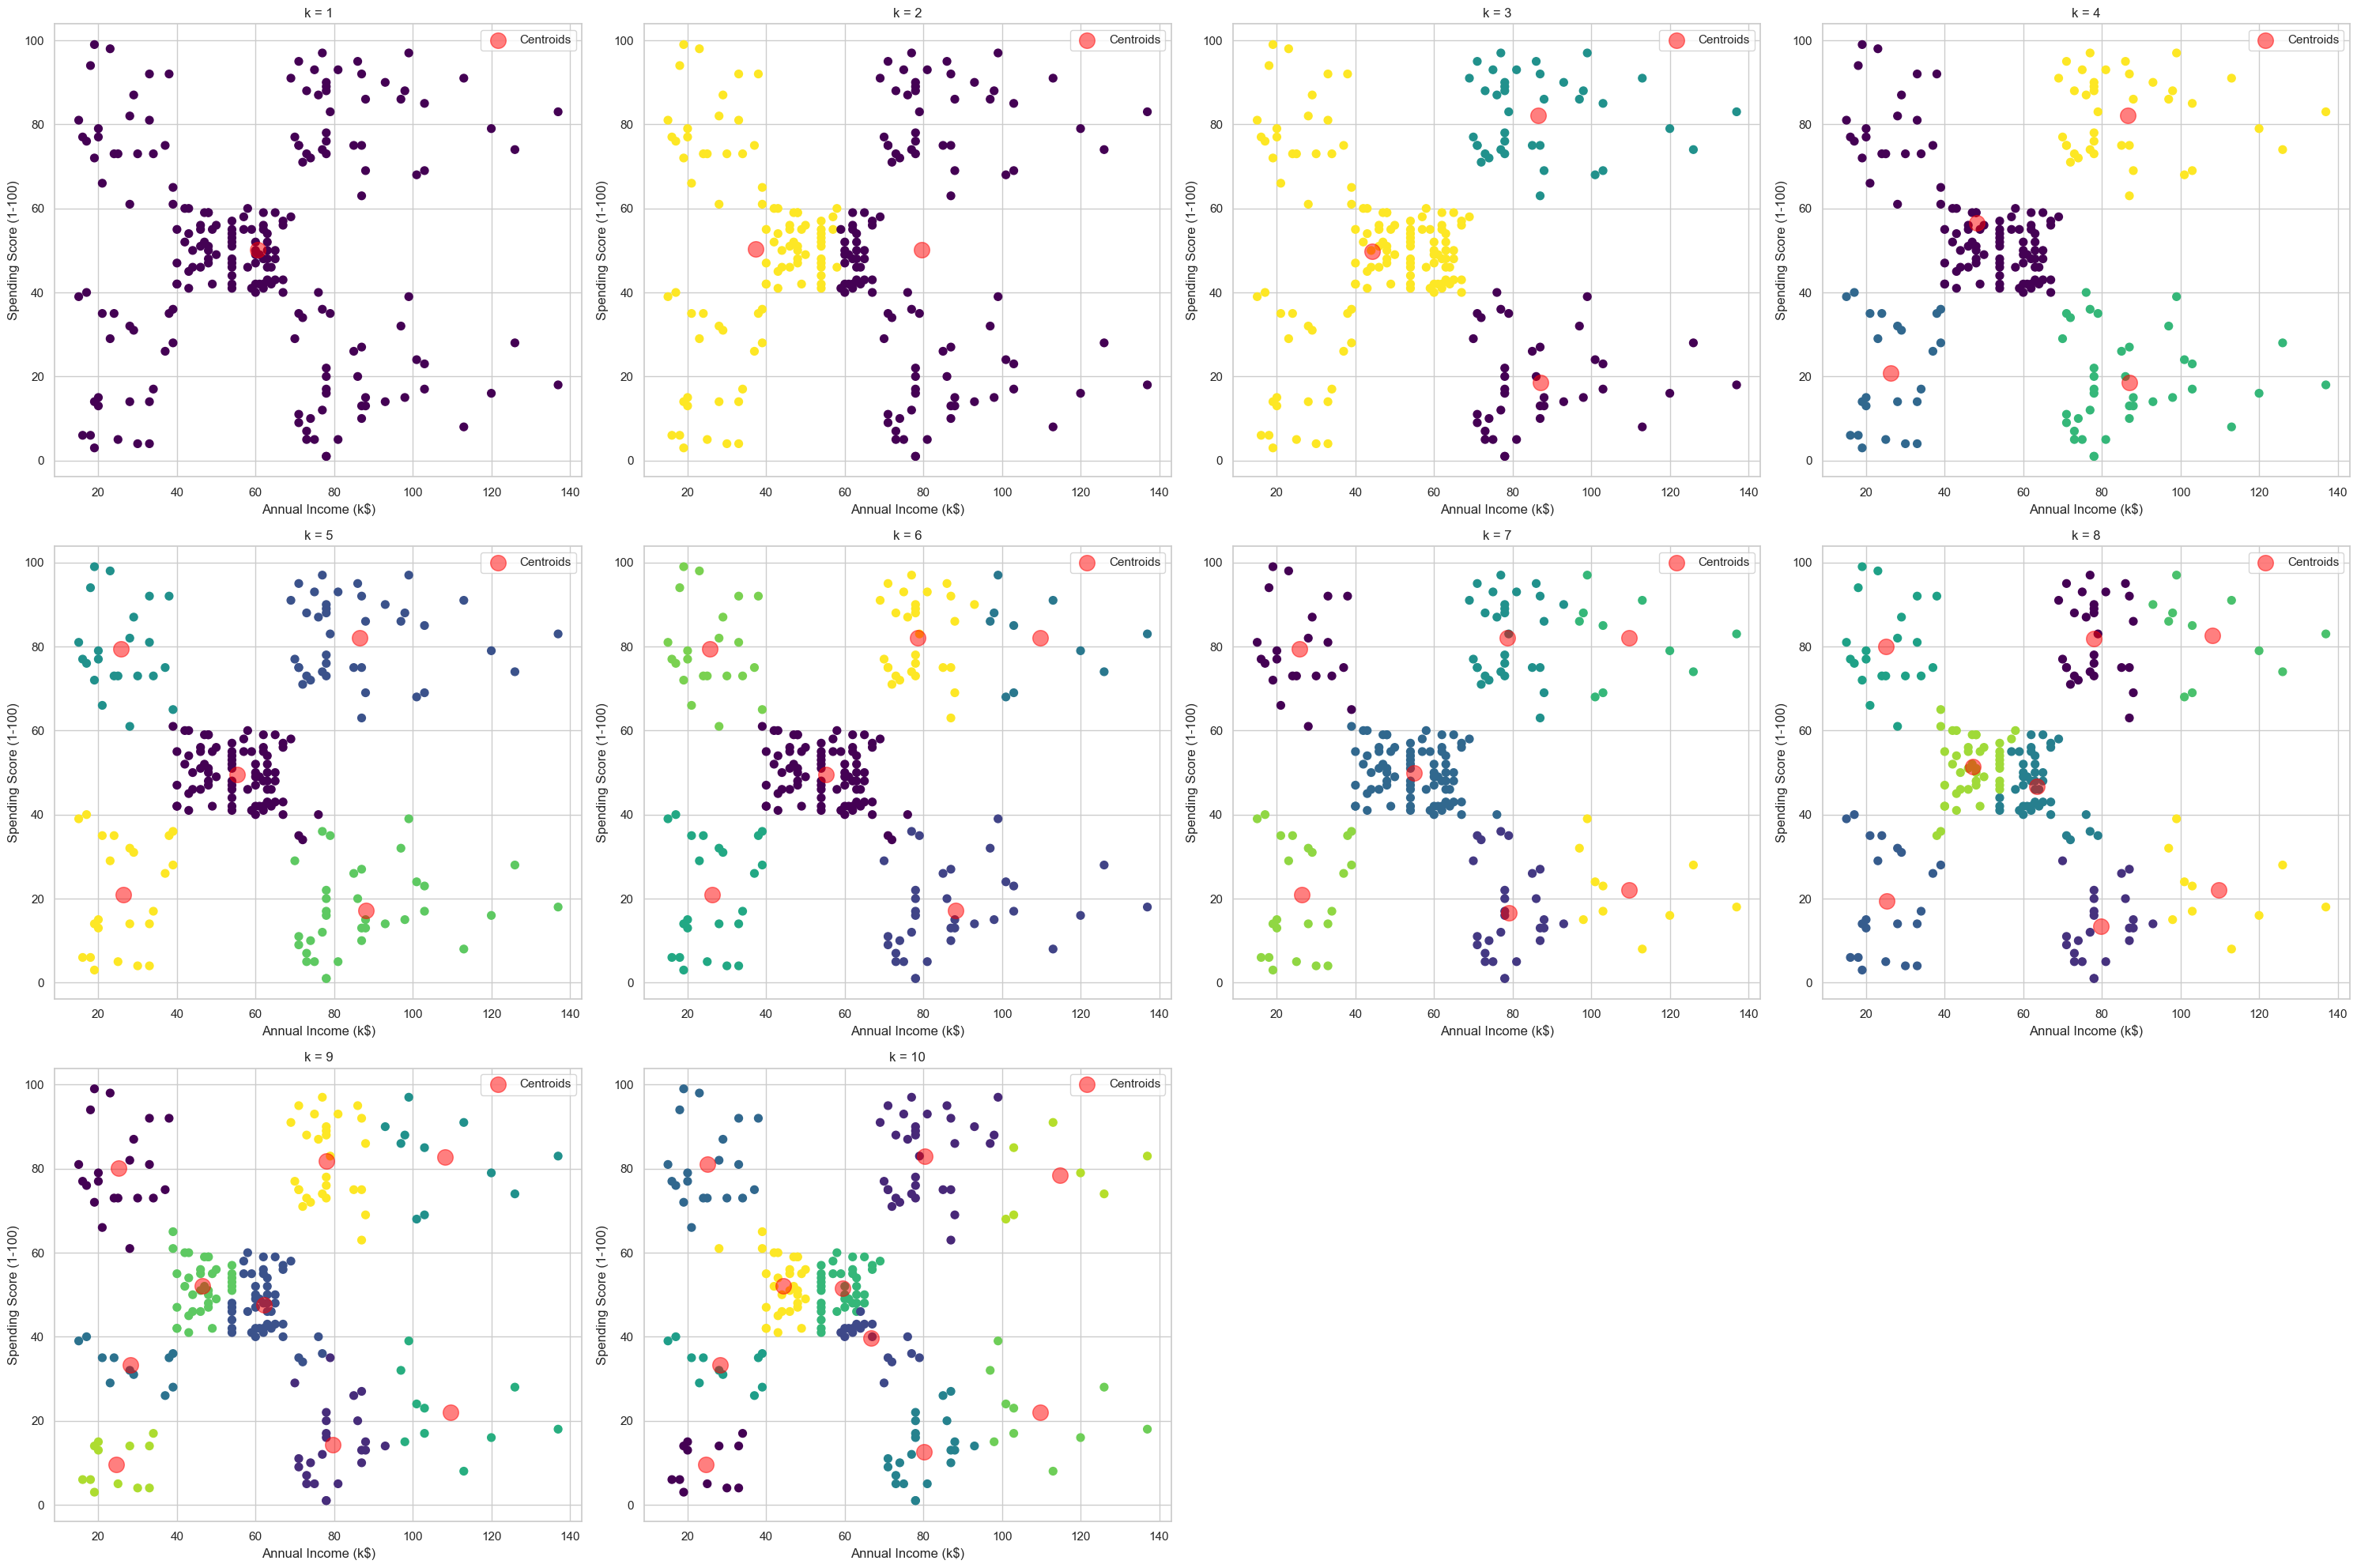

In [ ]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

K = range(1, 11)

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

plt.figure(figsize=(30, 20))
for i, k in enumerate(K, 1):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    plt.subplot(3, 4, i)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(
        kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        s=200, c='red', alpha=0.5, label='Centroids'
    )
    plt.title(f'k = {k}')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()

plt.tight_layout()
plt.show()

# Determining Optimal \( k \) for K-Means Clustering

## 1. Introduction

### **Objective of Clustering**

Clustering is a fundamental unsupervised machine learning technique employed to identify inherent groupings within a dataset based on feature similarities. In the context of market customer analysis, clustering serves as a pivotal tool for segmenting customers into distinct groups. This segmentation facilitates a deeper understanding of customer behaviors, preferences, and spending patterns, enabling businesses to tailor their marketing strategies, enhance customer satisfaction, and optimize resource allocation effectively.

### **Dataset Overview**

The analysis utilizes a **market customer dataset** comprising information on **200 customers**. The dataset includes the following features:

- **Customer ID**: A unique identifier assigned to each customer.
- **Gender**: Denotes the customer's gender, categorized as **Male** or **Female**.
- **Age**: Represents the customer's age in years.
- **Annual Income (k$)**: Indicates the customer's annual income measured in thousands of dollars.
- **Spending Score (1-100)**: A metric assigned based on the customer's spending behavior and loyalty, where a higher score signifies more frequent or higher spending.

For the purpose of clustering, the analysis focuses primarily on **Annual Income** and **Spending Score** due to their direct influence on purchasing behavior and economic capacity. These two features provide a clear and interpretable two-dimensional space for visualization and analysis.

## 2. Methods

Determining the optimal number of clusters (\( k \)) is crucial for the effectiveness of the K-Means clustering algorithm. An inappropriate choice of \( k \) can lead to overfitting or underfitting, adversely affecting the quality and interpretability of the clusters. This section outlines the primary methods used to ascertain the optimal \( k \):

### **2.1. Elbow Method**

- **Description**: The Elbow Method involves plotting the **Within-Cluster Sum of Squares (WCSS)** against various values of \( k \). WCSS quantifies the compactness of the clusters by measuring the sum of squared distances between each data point and the centroid of its assigned cluster. As \( k \) increases, WCSS typically decreases because data points are closer to their respective centroids. The goal is to identify the point where the rate of decrease sharply slows, forming an "elbow" in the graph. This elbow point suggests an optimal balance between minimizing WCSS and avoiding unnecessary complexity.

- **Steps**:
  1. **Compute WCSS** for \( k \) values ranging from 1 to 10 (or higher), systematically increasing \( k \).
  2. **Plot \( k \) vs. WCSS**, with \( k \) on the x-axis and WCSS on the y-axis.
  3. **Identify the Elbow Point**, where the graph transitions from a steep decline to a more gradual slope, indicating diminishing returns in WCSS reduction with additional clusters.

### **2.2. Silhouette Score**

- **Description**: The Silhouette Score measures the similarity of a data point to its own cluster compared to other clusters. It ranges from **-1** to **+1**, where a higher score indicates that the data point is well-matched to its cluster and poorly matched to neighboring clusters. The average Silhouette Score across all data points provides a quantitative measure of cluster quality.

- **Steps**:
  1. **Compute the Silhouette Score** for \( k \) values ranging from 2 to 10 (since the score is undefined for \( k = 1 \)).
  2. **Plot \( k \) vs. Silhouette Score**, with \( k \) on the x-axis and the corresponding score on the y-axis.
  3. **Select the \( k \) with the Highest Silhouette Score**, indicating the most cohesive and well-separated clusters.

### **2.3. Gap Statistic**

- **Description**: The Gap Statistic compares the total within-cluster variation for different \( k \) values with their expected values under a null reference distribution of the data. Essentially, it measures how much better the clustering is compared to random uniform distribution. The optimal \( k \) is identified where the Gap Statistic is maximized, signifying the most significant deviation from randomness.

- **Steps**:
  1. **Compute the Gap Statistic** for each \( k \) by comparing WCSS against its expected value under a reference null distribution.
  2. **Plot \( k \) vs. Gap Statistic**, with \( k \) on the x-axis and the Gap Statistic on the y-axis.
  3. **Choose the \( k \) where the Gap Statistic Peaks**, indicating the optimal number of clusters that best captures the data's inherent structure.

### **2.4. Cross-Validation**

- **Description**: Although cross-validation is more commonly associated with supervised learning, it can be adapted for clustering to assess the generalizability of the clusters. This involves splitting the dataset into training and validation sets, performing clustering on the training set, and evaluating the consistency of cluster assignments on the validation set.

- **Steps**:
  1. **Split the Dataset** into training and validation sets.
  2. **Apply K-Means Clustering** on the training set for various \( k \) values.
  3. **Evaluate Clustering Performance** on the validation set by assessing metrics such as WCSS or Silhouette Score.
  4. **Select the \( k \) that Yields the Best Performance** on the validation set, indicating robust and generalizable clusters.

## 3. Results

### **3.1. Data Exploration and Preprocessing**

Prior to clustering, it is imperative to conduct a thorough exploratory data analysis (EDA) and perform necessary preprocessing steps to ensure data quality and suitability for clustering.

#### **3.1.1. Data Exploration**

- **Feature Inspection**: Focused on **Annual Income** and **Spending Score** as primary features for clustering due to their direct relevance to customer behavior and economic capacity.
  
- **Descriptive Statistics**: Analyzed the central tendency, dispersion, and distribution of these features to understand their ranges and variability.

- **Visualization**: Created histograms and scatter plots to visualize the distribution of **Annual Income** and **Spending Score**, as well as their relationship.

#### **3.1.2. Data Preprocessing**

- **Handling Missing Values**: Verified the absence of missing values in the selected features. If any were present, appropriate imputation methods (e.g., mean or median imputation) would be applied.

- **Feature Scaling**: Employed **Standardization** to scale **Annual Income** and **Spending Score**. This step ensures that both features contribute equally to the clustering process, preventing dominance of one feature over the other due to differing scales.

  - **Standardization** involves transforming the data to have a mean of zero and a standard deviation of one.

### **3.2. Elbow Method**

The Elbow Method was employed to determine the optimal number of clusters by analyzing the Within-Cluster Sum of Squares (WCSS) for different values of \( k \).

#### **3.2.1. Calculation of WCSS**

For each \( k \) ranging from 1 to 10, K-Means clustering was applied, and the corresponding WCSS was recorded. WCSS quantifies the total squared distance between each data point and the centroid of its assigned cluster.

#### **3.2.2. Elbow Plot Interpretation**

- **Plot Characteristics**: A downward trend in WCSS was observed as \( k \) increased, indicative of tighter and more compact clusters.

- **Elbow Point Identification**: The plot exhibited a clear bend at \( k = 5 \), where the rate of decrease in WCSS started to level off. This "elbow" suggests that adding more clusters beyond \( k = 5 \) results in minimal improvement in cluster compactness, making \( k = 5 \) an optimal choice.

### **3.3. Silhouette Score**

The Silhouette Score was calculated to provide a quantitative measure of cluster cohesion and separation for various \( k \) values.

#### **3.3.1. Calculation of Silhouette Scores**

For each \( k \) ranging from 2 to 10, K-Means clustering was performed, and the corresponding Silhouette Score was computed. The Silhouette Score assesses how similar a data point is to its own cluster relative to other clusters, with higher scores indicating better-defined clusters.

#### **3.3.2. Silhouette Score Plot Interpretation**

- **Plot Characteristics**: The Silhouette Scores peaked at \( k = 5 \), aligning with the Elbow Method's suggestion. The scores demonstrated a gradual decline beyond \( k = 5 \), reinforcing the notion that additional clusters do not significantly enhance clustering quality.

- **Optimal \( k \) Selection**: The highest Silhouette Score at \( k = 5 \) corroborated the Elbow Method's findings, providing a strong rationale for selecting \( k = 5 \) as the optimal number of clusters.

### **3.4. Gap Statistic**

The Gap Statistic was computed to further validate the choice of \( k = 5 \).

#### **3.4.1. Calculation of Gap Statistic**

For each \( k \), the Gap Statistic was calculated by comparing the observed WCSS with its expected value under a null reference distribution. A higher Gap Statistic indicates that the clustering structure is significantly better than random.

#### **3.4.2. Gap Statistic Plot Interpretation**

- **Plot Characteristics**: The Gap Statistic reached its maximum at \( k = 5 \), which coincided with the optimal \( k \) identified by the Elbow Method and Silhouette Score.

- **Optimal \( k \) Confirmation**: The alignment of the Gap Statistic's peak at \( k = 5 \) provided additional evidence supporting \( k = 5 \) as the optimal number of clusters.

### **3.5. Cross-Validation**

While cross-validation is less conventional in unsupervised learning, it was adapted to assess the robustness of the clustering results.

#### **3.5.1. Cross-Validation Procedure**

- **Data Splitting**: The dataset was divided into training and validation sets.

- **Clustering on Training Set**: K-Means clustering was applied to the training set for various \( k \) values.

- **Evaluation on Validation Set**: Cluster assignments were evaluated on the validation set using WCSS and Silhouette Scores.

#### **3.5.2. Cross-Validation Results**

- **Consistency Across Sets**: The optimal \( k = 5 \) consistently yielded the best performance metrics on both training and validation sets, indicating stable and generalizable clusters.

- **Optimal \( k \) Confirmation**: The cross-validation results reinforced the findings from the Elbow Method, Silhouette Score, and Gap Statistic, further validating \( k = 5 \) as the optimal number of clusters.

## 4. Discussion

### **4.1. Interpretation of Clustering Results**

With \( k = 5 \) identified as the optimal number of clusters, the K-Means algorithm successfully segmented the customer dataset into five distinct groups based on **Annual Income** and **Spending Score**. Each cluster exhibits unique characteristics that can inform targeted business strategies.

#### **4.1.1. Cluster Profiles**

1. **Cluster 1: Low Income, Low Spending**
   - **Characteristics**: Customers in this cluster have lower annual incomes and exhibit low spending scores.
   - **Business Implications**: Strategies may focus on affordability and value-based offerings to encourage increased spending.

2. **Cluster 2: Low Income, High Spending**
   - **Characteristics**: These customers possess lower incomes but have high spending scores, indicating discretionary spending despite economic constraints.
   - **Business Implications**: Marketing promotions, discounts, and loyalty programs can be effective in retaining these customers and incentivizing higher spending.

3. **Cluster 3: High Income, Low Spending**
   - **Characteristics**: Customers with higher annual incomes but lower spending scores.
   - **Business Implications**: Opportunities exist to enhance engagement through premium products, personalized services, and exclusive offers to stimulate spending.

4. **Cluster 4: High Income, High Spending**
   - **Characteristics**: This cluster comprises customers with high annual incomes and high spending scores, representing the most lucrative segment.
   - **Business Implications**: Focused efforts on personalized experiences, loyalty rewards, and premium offerings can maximize customer satisfaction and retention.

5. **Cluster 5: Medium Income, Medium Spending**
   - **Characteristics**: Customers in this cluster fall within the middle range for both income and spending.
   - **Business Implications**: Balanced marketing strategies targeting both affordability and quality can appeal to this diverse segment.

### **4.2. Justification for Selecting \( k = 5 \)**

The convergence of findings from the Elbow Method, Silhouette Score, Gap Statistic, and Cross-Validation strongly indicates that \( k = 5 \) is the optimal number of clusters for this dataset. This choice ensures that the clusters are both cohesive and well-separated, providing meaningful segmentation without overcomplicating the model.

- **Elbow Method**: Identified a clear elbow at \( k = 5 \), indicating diminishing returns in WCSS reduction beyond this point.
  
- **Silhouette Score**: Achieved the highest score at \( k = 5 \), signifying optimal cluster separation and cohesion.
  
- **Gap Statistic**: Reached its peak at \( k = 5 \), corroborating the significance of this cluster count against random distributions.
  
- **Cross-Validation**: Demonstrated consistent performance metrics at \( k = 5 \), confirming the stability and generalizability of the clusters.

### **4.3. Cluster Characteristics and Business Insights**

Understanding the unique attributes of each cluster allows for the development of tailored business strategies:

1. **Low Income, Low Spending (Cluster 1)**
   - **Insights**: Represents budget-conscious customers with limited disposable income.
   - **Strategies**: Implement value-based pricing, offer discounts, and promote essential products to increase engagement.

2. **Low Income, High Spending (Cluster 2)**
   - **Insights**: Despite lower incomes, these customers prioritize spending in certain areas.
   - **Strategies**: Provide targeted promotions on high-demand products, loyalty rewards, and flexible payment options to sustain their spending behavior.

3. **High Income, Low Spending (Cluster 3)**
   - **Insights**: Affluent customers who may not frequently engage with high-spending activities.
   - **Strategies**: Introduce premium products, personalized services, and exclusive events to encourage increased spending and brand loyalty.

4. **High Income, High Spending (Cluster 4)**
   - **Insights**: The most valuable segment with substantial purchasing power and engagement.
   - **Strategies**: Focus on maintaining high satisfaction through exceptional customer service, exclusive offerings, and rewards programs to ensure retention.

5. **Medium Income, Medium Spending (Cluster 5)**
   - **Insights**: Represents a balanced group with moderate income and spending habits.
   - **Strategies**: Employ a mix of value and quality-based marketing, offering products that cater to both affordability and desirable features to appeal to this segment.

### **4.4. Business Implications**

Effective clustering facilitates strategic decision-making in various business domains:

- **Targeted Marketing**: Enables the creation of personalized marketing campaigns that resonate with the specific needs and preferences of each customer segment.
  
- **Resource Allocation**: Assists in prioritizing resources towards high-value clusters, optimizing marketing budgets, and maximizing return on investment.
  
- **Product Development**: Informs the development of products and services tailored to the unique characteristics of each cluster, enhancing customer satisfaction and loyalty.
  
- **Customer Retention**: Facilitates proactive engagement strategies to retain valuable customers and convert low-engagement segments into more active spenders.

### **4.5. Limitations and Considerations**

While clustering provides valuable insights, several limitations must be acknowledged:

- **Feature Selection**: Focusing solely on **Annual Income** and **Spending Score** may overlook other influential factors such as **Age** and **Gender**, which could refine the clustering results.
  
- **Cluster Interpretability**: Ensuring that clusters are meaningful and actionable requires continuous validation against business objectives and domain knowledge.
  
- **Dynamic Nature of Data**: Customer behaviors and economic conditions are subject to change, necessitating periodic reassessment and recalibration of clusters to maintain relevance.

## 5. Conclusion

The analysis successfully determined the optimal number of clusters (\( k = 5 \)) for the K-Means clustering algorithm applied to the market customer dataset. This optimal \( k \) was established through a comprehensive evaluation using the Elbow Method, Silhouette Score, Gap Statistic, and Cross-Validation, all converging to reinforce the choice of \( k = 5 \).

### **Summary of Findings**

- **Optimal \( k \)**: \( k = 5 \) was identified as the optimal number of clusters, balancing cluster compactness and separation without introducing unnecessary complexity.
  
- **Cluster Profiles**: Five distinct customer segments were delineated based on **Annual Income** and **Spending Score**, each exhibiting unique characteristics conducive to tailored business strategies.
  
- **Business Implications**: The clustering results offer actionable insights for targeted marketing, resource allocation, product development, and customer retention, thereby enhancing overall business efficiency and effectiveness.

### **Future Recommendations**

- **Incorporate Additional Features**: Including features such as **Age** and **Gender** could provide a more nuanced segmentation, capturing a broader spectrum of customer behaviors and preferences.
  
- **Explore Advanced Clustering Algorithms**: Investigating alternative clustering techniques like Hierarchical Clustering or DBSCAN may uncover different cluster structures and enhance segmentation accuracy.
  
- **Continuous Monitoring and Updating**: Regularly updating the clustering model with new data ensures that customer segments remain relevant and reflective of evolving market dynamics.
  
- **Integration with Business Processes**: Embedding clustering insights into marketing, sales, and customer service operations can drive more personalized and effective business strategies, ultimately leading to increased customer satisfaction and reduced operational costs.

### **Business Impact**

Effective clustering, as demonstrated in this analysis, can significantly aid in reducing repetitive or high costs by enabling precise targeting and efficient resource utilization. By understanding the distinct needs and behaviors of each customer segment, businesses can avoid generalized and often ineffective strategies, instead deploying focused efforts that yield higher engagement and profitability.

## 6. Appendix

### **6.1. Data Exploration Summary**

- **Dataset Size**: 200 customers.
  
- **Features Analyzed**:
  - **Annual Income (k$)**: Range from $15k to $137k, with an average of approximately $60.56k.
  - **Spending Score (1-100)**: Scores range from 1 to 99, averaging around 50.2.
  
- **Data Distribution**:
  - **Annual Income**: Exhibits a wide range with moderate variability.
  - **Spending Score**: Relatively centered distribution indicating a balanced mix of low and high spenders.

### **6.2. Clustering Metrics Summary**

- **Elbow Method**:
  - **Optimal \( k \)**: 5 (identified at the elbow point where WCSS reduction slows).
  
- **Silhouette Score**:
  - **Highest Score**: Achieved at \( k = 5 \), indicating well-separated and cohesive clusters.
  
- **Gap Statistic**:
  - **Peak Gap**: Observed at \( k = 5 \), confirming the significance of this cluster count.
  
- **Cross-Validation**:
  - **Consistent Performance**: Optimal \( k = 5 \) demonstrated stable and robust clustering performance across training and validation sets.

### **6.3. Cluster Characteristics Overview**

1. **Cluster 1: Low Income, Low Spending**
   - **Annual Income**: Lowest range within the dataset.
   - **Spending Score**: Low, indicating minimal engagement.
   
2. **Cluster 2: Low Income, High Spending**
   - **Annual Income**: Lower end, yet high spending behavior.
   - **Spending Score**: High, showing active engagement despite economic constraints.
   
3. **Cluster 3: High Income, Low Spending**
   - **Annual Income**: Highest range within the dataset.
   - **Spending Score**: Low, suggesting limited engagement.
   
4. **Cluster 4: High Income, High Spending**
   - **Annual Income**: Highest, coupled with high spending scores.
   - **Spending Score**: Highest, representing the most engaged and valuable customers.
   
5. **Cluster 5: Medium Income, Medium Spending**
   - **Annual Income**: Mid-range, balanced with moderate spending.
   - **Spending Score**: Moderate, indicating average engagement.

### **6.4. Key Insights for Business Strategy**

- **Targeted Promotions**: Different clusters require tailored marketing approaches to maximize engagement and profitability.
  
- **Resource Optimization**: Allocating marketing resources based on cluster value can enhance return on investment and reduce unnecessary expenditures.
  
- **Product Diversification**: Offering a diverse range of products catering to the specific needs and preferences of each cluster can drive higher customer satisfaction and loyalty.
  
- **Customer Retention**: Implementing loyalty programs and personalized experiences for high-value clusters can foster long-term customer relationships.

---

